# DS Job Salary Analysis







**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import geopandas as gpd
url = 'https://raw.githubusercontent.com/NevilleTeh/WIE3007_DMW/refs/heads/main/Data%20Science%20Salary%202021%20to%202023.csv'

**Load Dataset**

In [2]:
df = pd.read_csv(url)

# 1. Data Cleaning

In [3]:
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


**Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


**Statistics**

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


**Check Columns**

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

**Check Missing Values**

In [7]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0
company_size,0


**Replace values in dataset**

In [8]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [9]:
#Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [10]:
#Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [11]:
#show the dataset top row result
styled_df = df.head(5).style.set_properties(**{'background-color': '#e793ff ' ,'color':'black','border-color': '#8b8c8c'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,Entry-Level,Full-Time,Applied Scientist,213660,USD,213660,US,Large
1,2023,Entry-Level,Full-Time,Applied Scientist,130760,USD,130760,US,Large
2,2023,Entry-Level,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Large
3,2023,Entry-Level,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Large
4,2023,Entry-Level,Full-Time,Applied Scientist,204620,USD,204620,US,Large


In [23]:
print(mean_salaries['salary_in_usd'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary_in_usd, dtype: float64


In [24]:
mean_salaries = mean_salaries[mean_salaries['salary_in_usd'] > 0]


# 2. Exploratory Data Analysis(EDA)

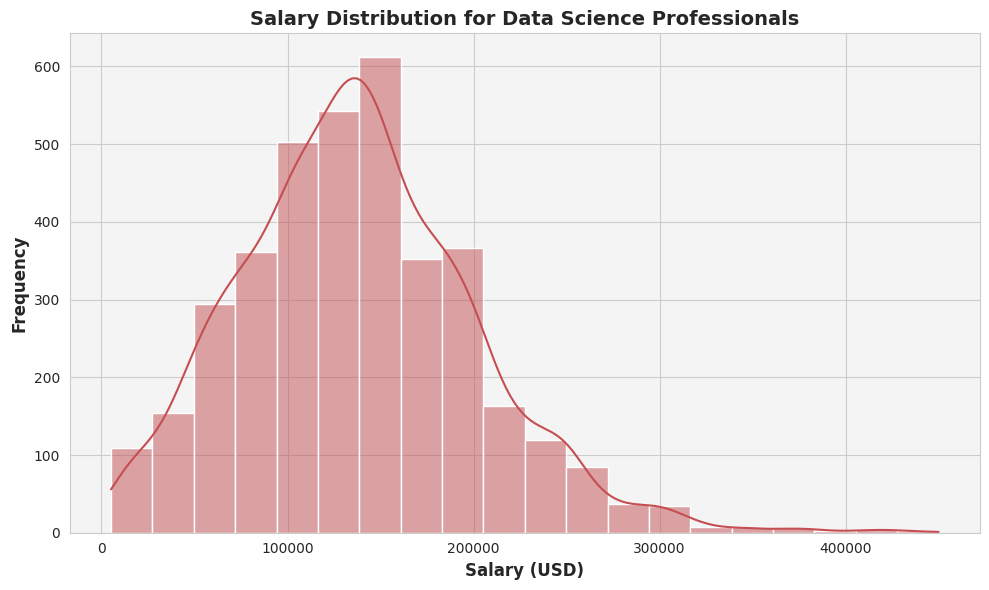

In [13]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Show the plot
plt.tight_layout()
plt.show()

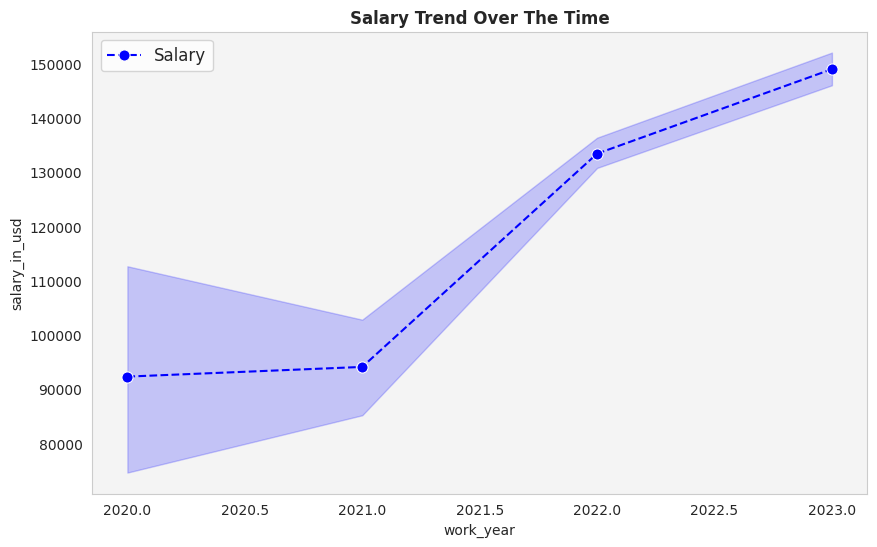

In [14]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

# Remove the grid lines
p.grid(False)

plt.show()

In [15]:

# Create the bar chart with enhancements
fig = px.bar(
    x=df['job_title'].value_counts().head(10).index,
    y=df['job_title'].value_counts().head(10),
    title='Top 10 Most Popular Job Designations',
    labels={'y': 'No. of Posts', 'x': 'Job Designations'},
    color=df['job_title'].value_counts().head(10),  # Adds color to each bar
    color_continuous_scale='Reds'  # Choose a color scale
)

# Update layout for a cleaner look
fig.update_layout(
    title_font=dict(size=20, color='darkblue', family='Arial'),
    width=800,  # Adjust the width here
    height=800,  # Adjust the height here
    xaxis_tickangle=-45,  # Rotate x-axis labels
    yaxis_title=dict(font=dict(size=14, color='black')),
    xaxis_title=dict(font=dict(size=14, color='black')),
    plot_bgcolor='#f9f9f9',  # Background color
)

# Display count values on top of bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

In [16]:
xdf=df.groupby(['job_title'])['salary_in_usd'].median().sort_values(ascending=False).head(10)
# Create the bar chart
fig = px.bar(
    x=xdf.index,
    y=xdf,
    title='Top 10 High-Paying Job Designations',
    labels={'y': 'Median Salary (USD)', 'x': 'Job Designations'},
    text=xdf,  # Add values on top of each bar
    color=xdf,  # Color based on salary values
    color_continuous_scale='Blues'  # Color scheme for a more dynamic look
)

# Beautify the layout
fig.update_layout(
    title_font=dict(size=20, color='darkblue', family='Arial'),
    xaxis_title=dict(font=dict(size=14, color='black')),
    yaxis_title=dict(font=dict(size=14, color='black')),
    plot_bgcolor='#f9f9f9',  # Soft background color
    paper_bgcolor='white',  # Borderless paper color
    width=800,  # Width of the chart
    height=800  # Height of the chart
)

# Customize the text on bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Remove grid lines for a cleaner look
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()

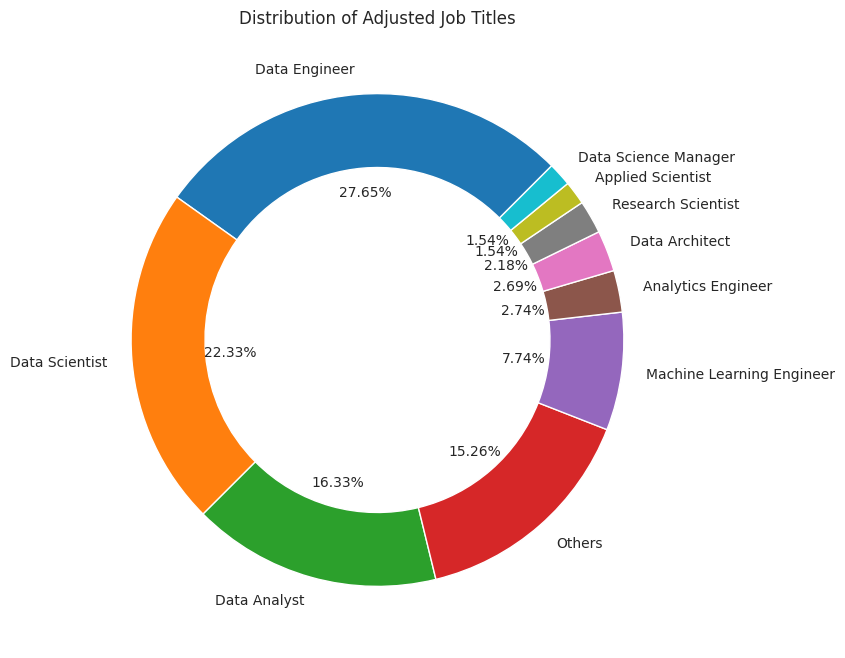

In [17]:
# Calculate frequency of each job title
job_title_counts = df['job_title'].value_counts()

# Determine titles below the threshold, e.g., less than N occurrences
N=50
low_frequency_titles = job_title_counts[job_title_counts < N].index

# Replace these titles in the dataframe with "Others"
df['adjusted_job_title'] = df['job_title'].apply(lambda x: "Others" if x in low_frequency_titles else x)

# Recalculate the frequency
adjusted_counts = df['adjusted_job_title'].value_counts()

# Plot
plt.figure(figsize=(10,8))
adjusted_counts.plot.pie(autopct='%.2f%%', startangle=45, wedgeprops=dict(width=0.3))
plt.title('Distribution of Adjusted Job Titles')
plt.ylabel('')  # Hide the 'adjusted_job_title' y-label
plt.show()

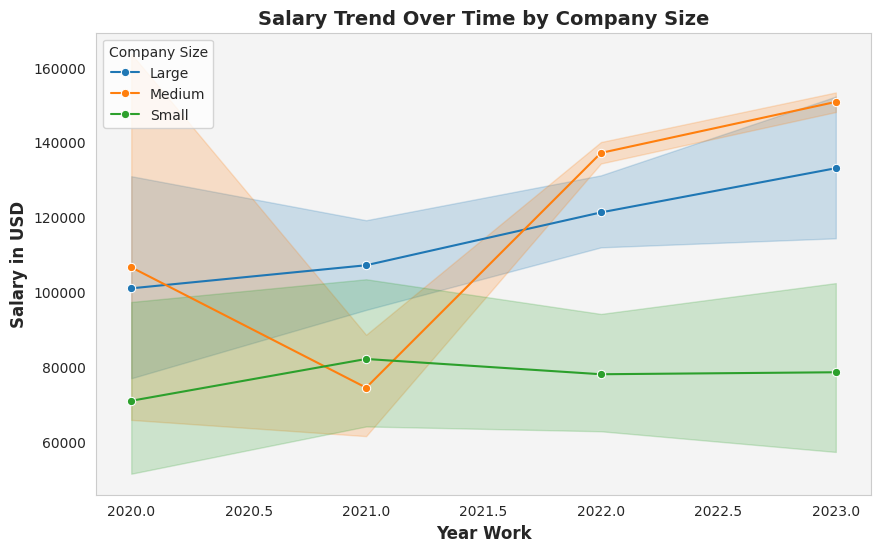

In [20]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

In [21]:
# Assuming `exp_salary` is created from the DataFrame `df`
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Create an Altair bar chart
chart = alt.Chart(exp_salary).mark_bar(size=40).encode(
    x=alt.X('experience_level:O', title='Experience Level', axis=alt.Axis(labelFontSize=12, labelColor='brown')),
    y=alt.Y('salary_in_usd:Q', title='Average Salary (USD)', axis=alt.Axis(labelFontSize=12, labelColor='brown')),
    color=alt.Color('experience_level:N', scale=alt.Scale(scheme='reds'))
).properties(
    width=600,
    height=400,
    title=alt.TitleParams(
        text='Average Salary by Experience Level',
        fontSize=16,
        fontWeight='bold',
        color='darkred',
        anchor='middle'
    )
)

# Add text labels on top of bars
text = chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,  # Adjusts position above the bars
    color='black',
    fontSize=12,
    fontWeight='bold'
).encode(
    text=alt.Text('salary_in_usd:Q', format='$,.0f')  # Format as currency
)

# Combine the chart and text layers
final_chart = chart + text

# Apply global config (e.g., background color)
final_chart = final_chart.configure_view(
    strokeWidth=0,  # Removes outer border lines
    fill='#f4f4f4'  # Background color
)

final_chart.display()



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.LayerChart(...)

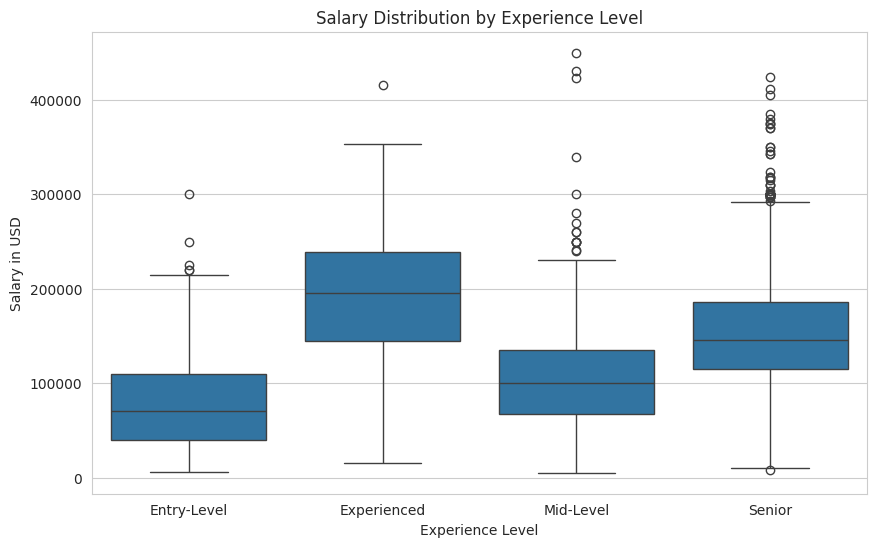

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

In [ ]:
pip install autoviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


Shape of your Data Set loaded: (3761, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1351 du

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
work_year,int64,0.000000,0,2020.000000,2023.000000,Possible date-time colum: transform before modeling step.
experience_level,object,0.000000,0,,,No issue
employment_type,object,0.000000,0,,,"3 rare categories: ['PT', 'CT', 'FL']. Group them into a single category or drop the categories."
job_title,object,0.000000,3,,,81 rare categories: Too many to list. Group them into a single category or drop the categories.
salary,int64,0.000000,33,6000.000000,30400000.000000,Column has 92 outliers greater than upper bound (328132.50) or lower than lower bound(-57287.50). Cap them or remove them.
salary_currency,object,0.000000,0,,,15 rare categories: Too many to list. Group them into a single category or drop the categories.
salary_in_usd,int64,0.000000,42,5132.000000,450000.000000,Column has 29 outliers greater than upper bound (313708.00) or lower than lower bound(-56180.00). Cap them or remove them.
company_location,object,0.000000,2,,,65 rare categories: Too many to list. Group them into a single category or drop the categories.
company_size,object,0.000000,0,,,No issue


Number of All Scatter Plots = 3


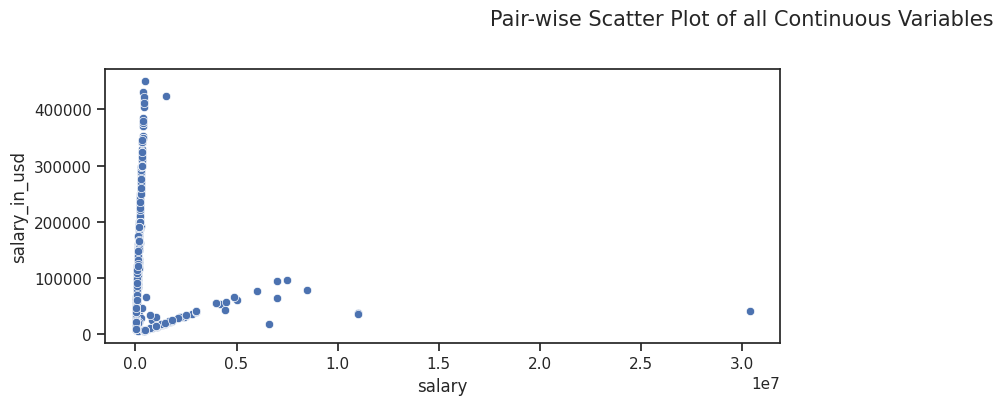

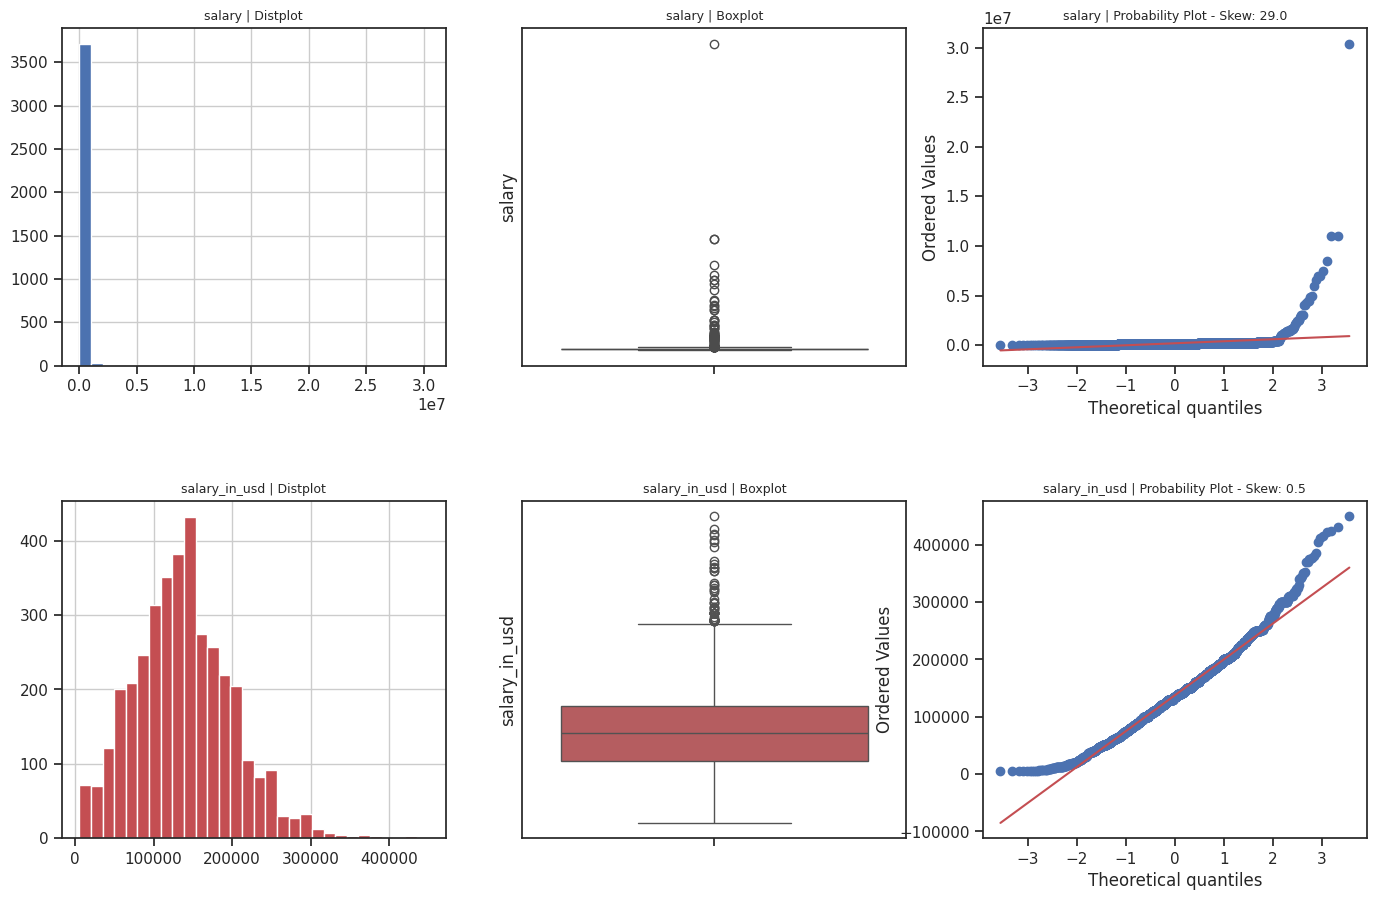

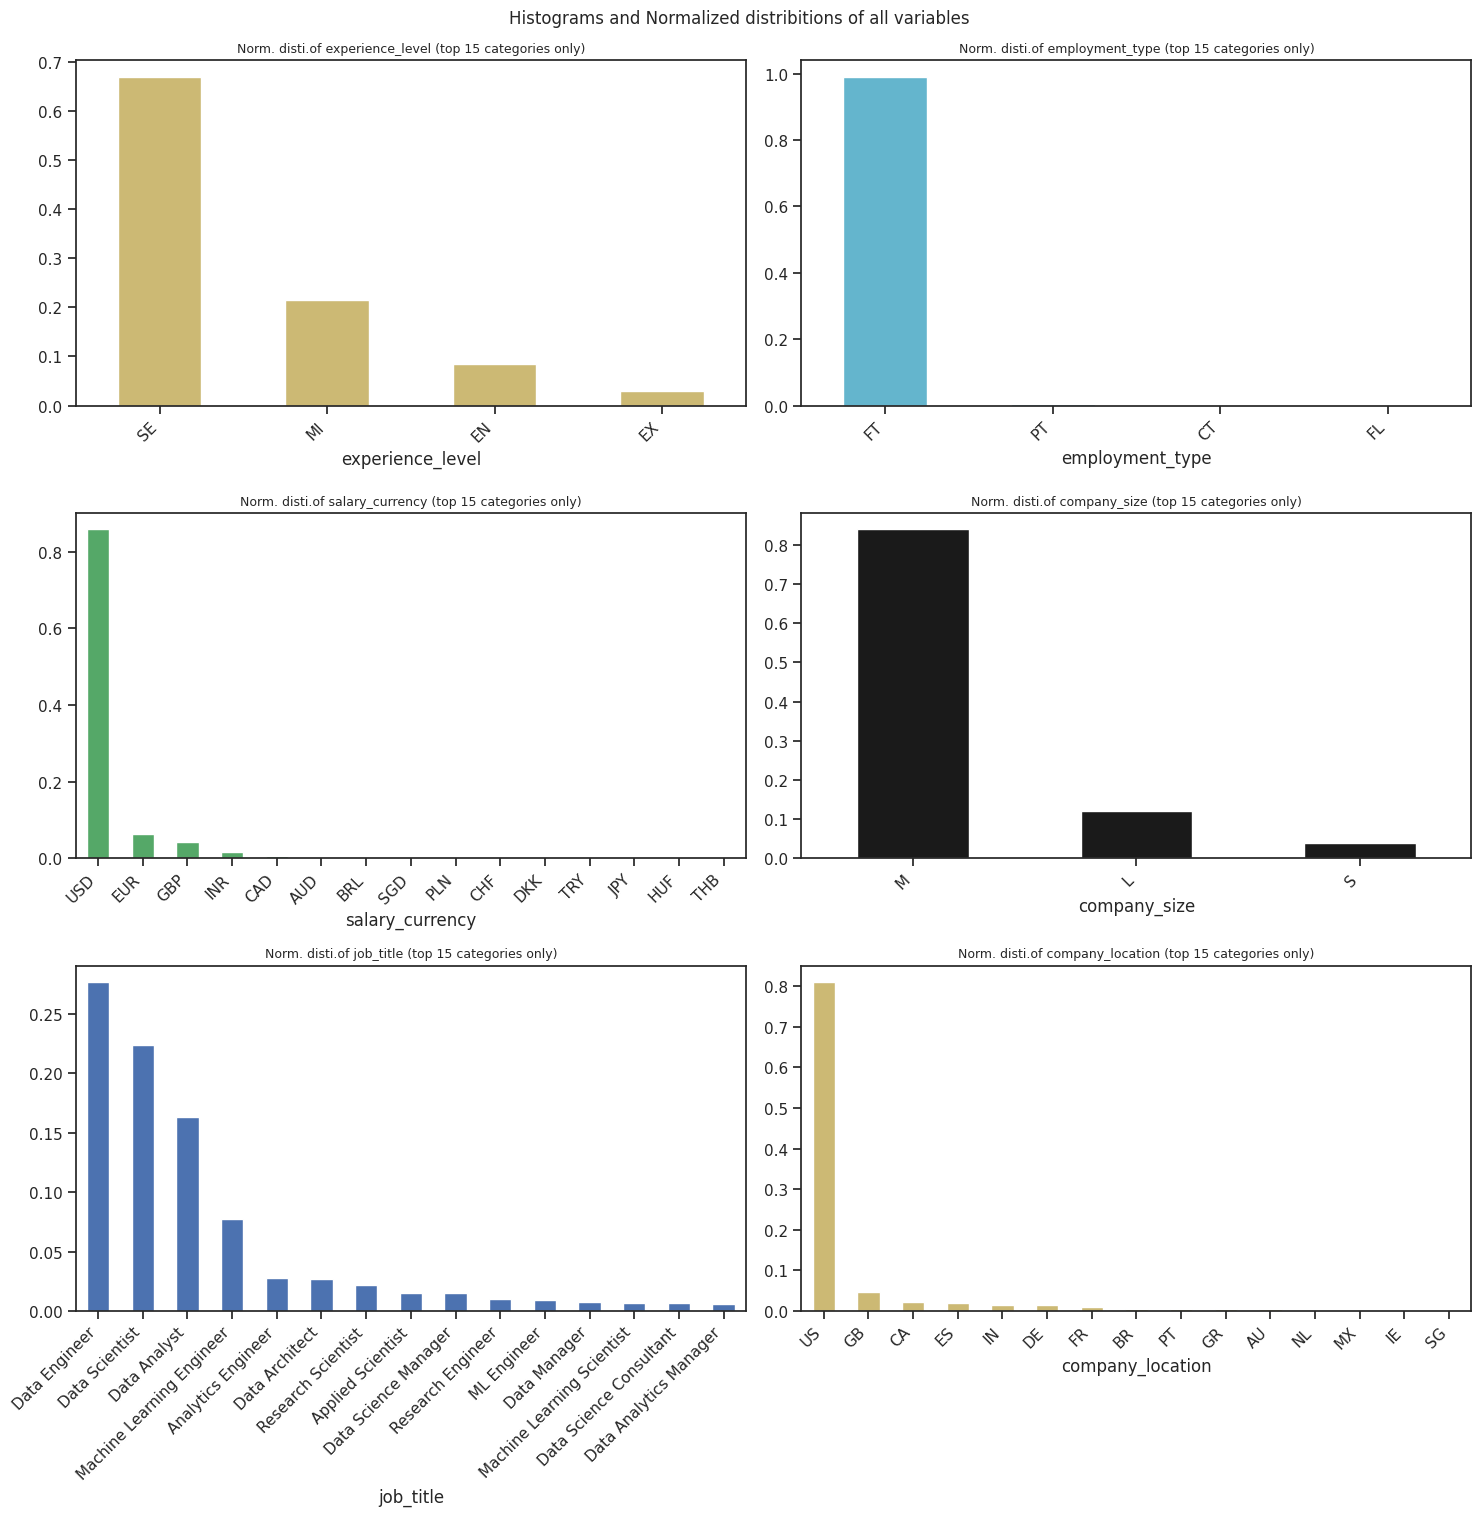

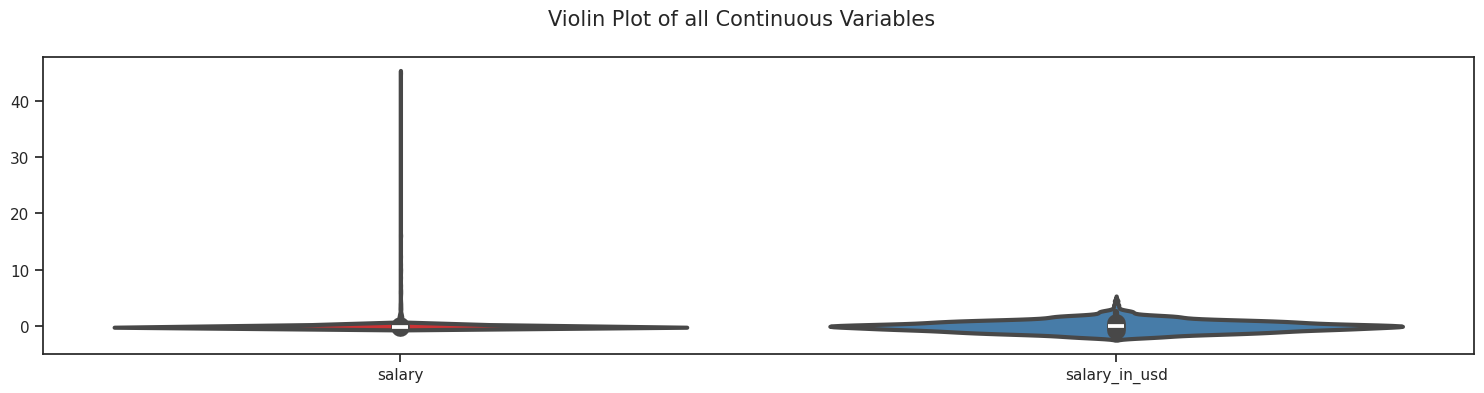

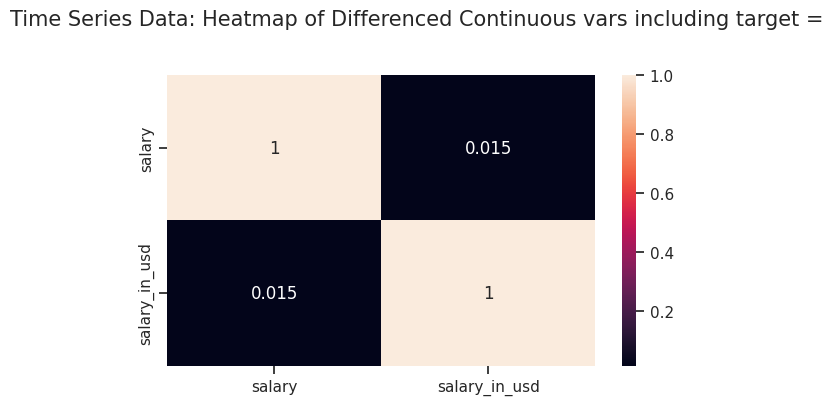

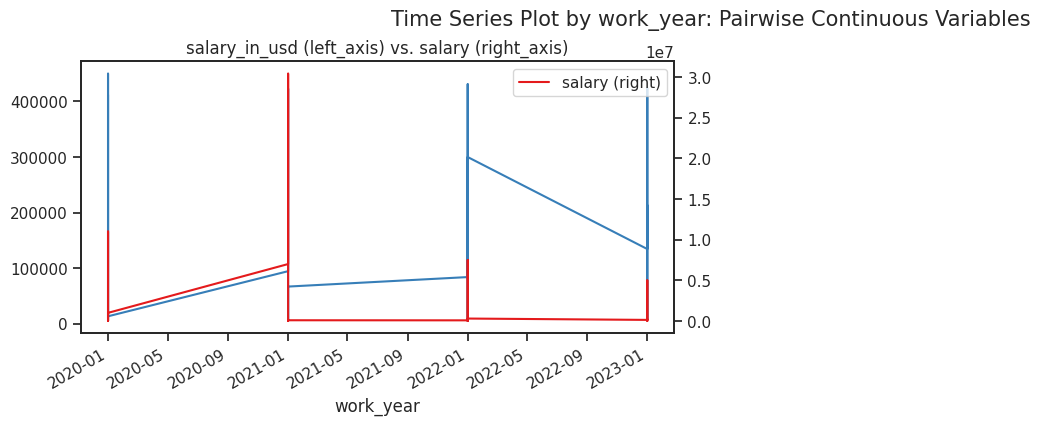

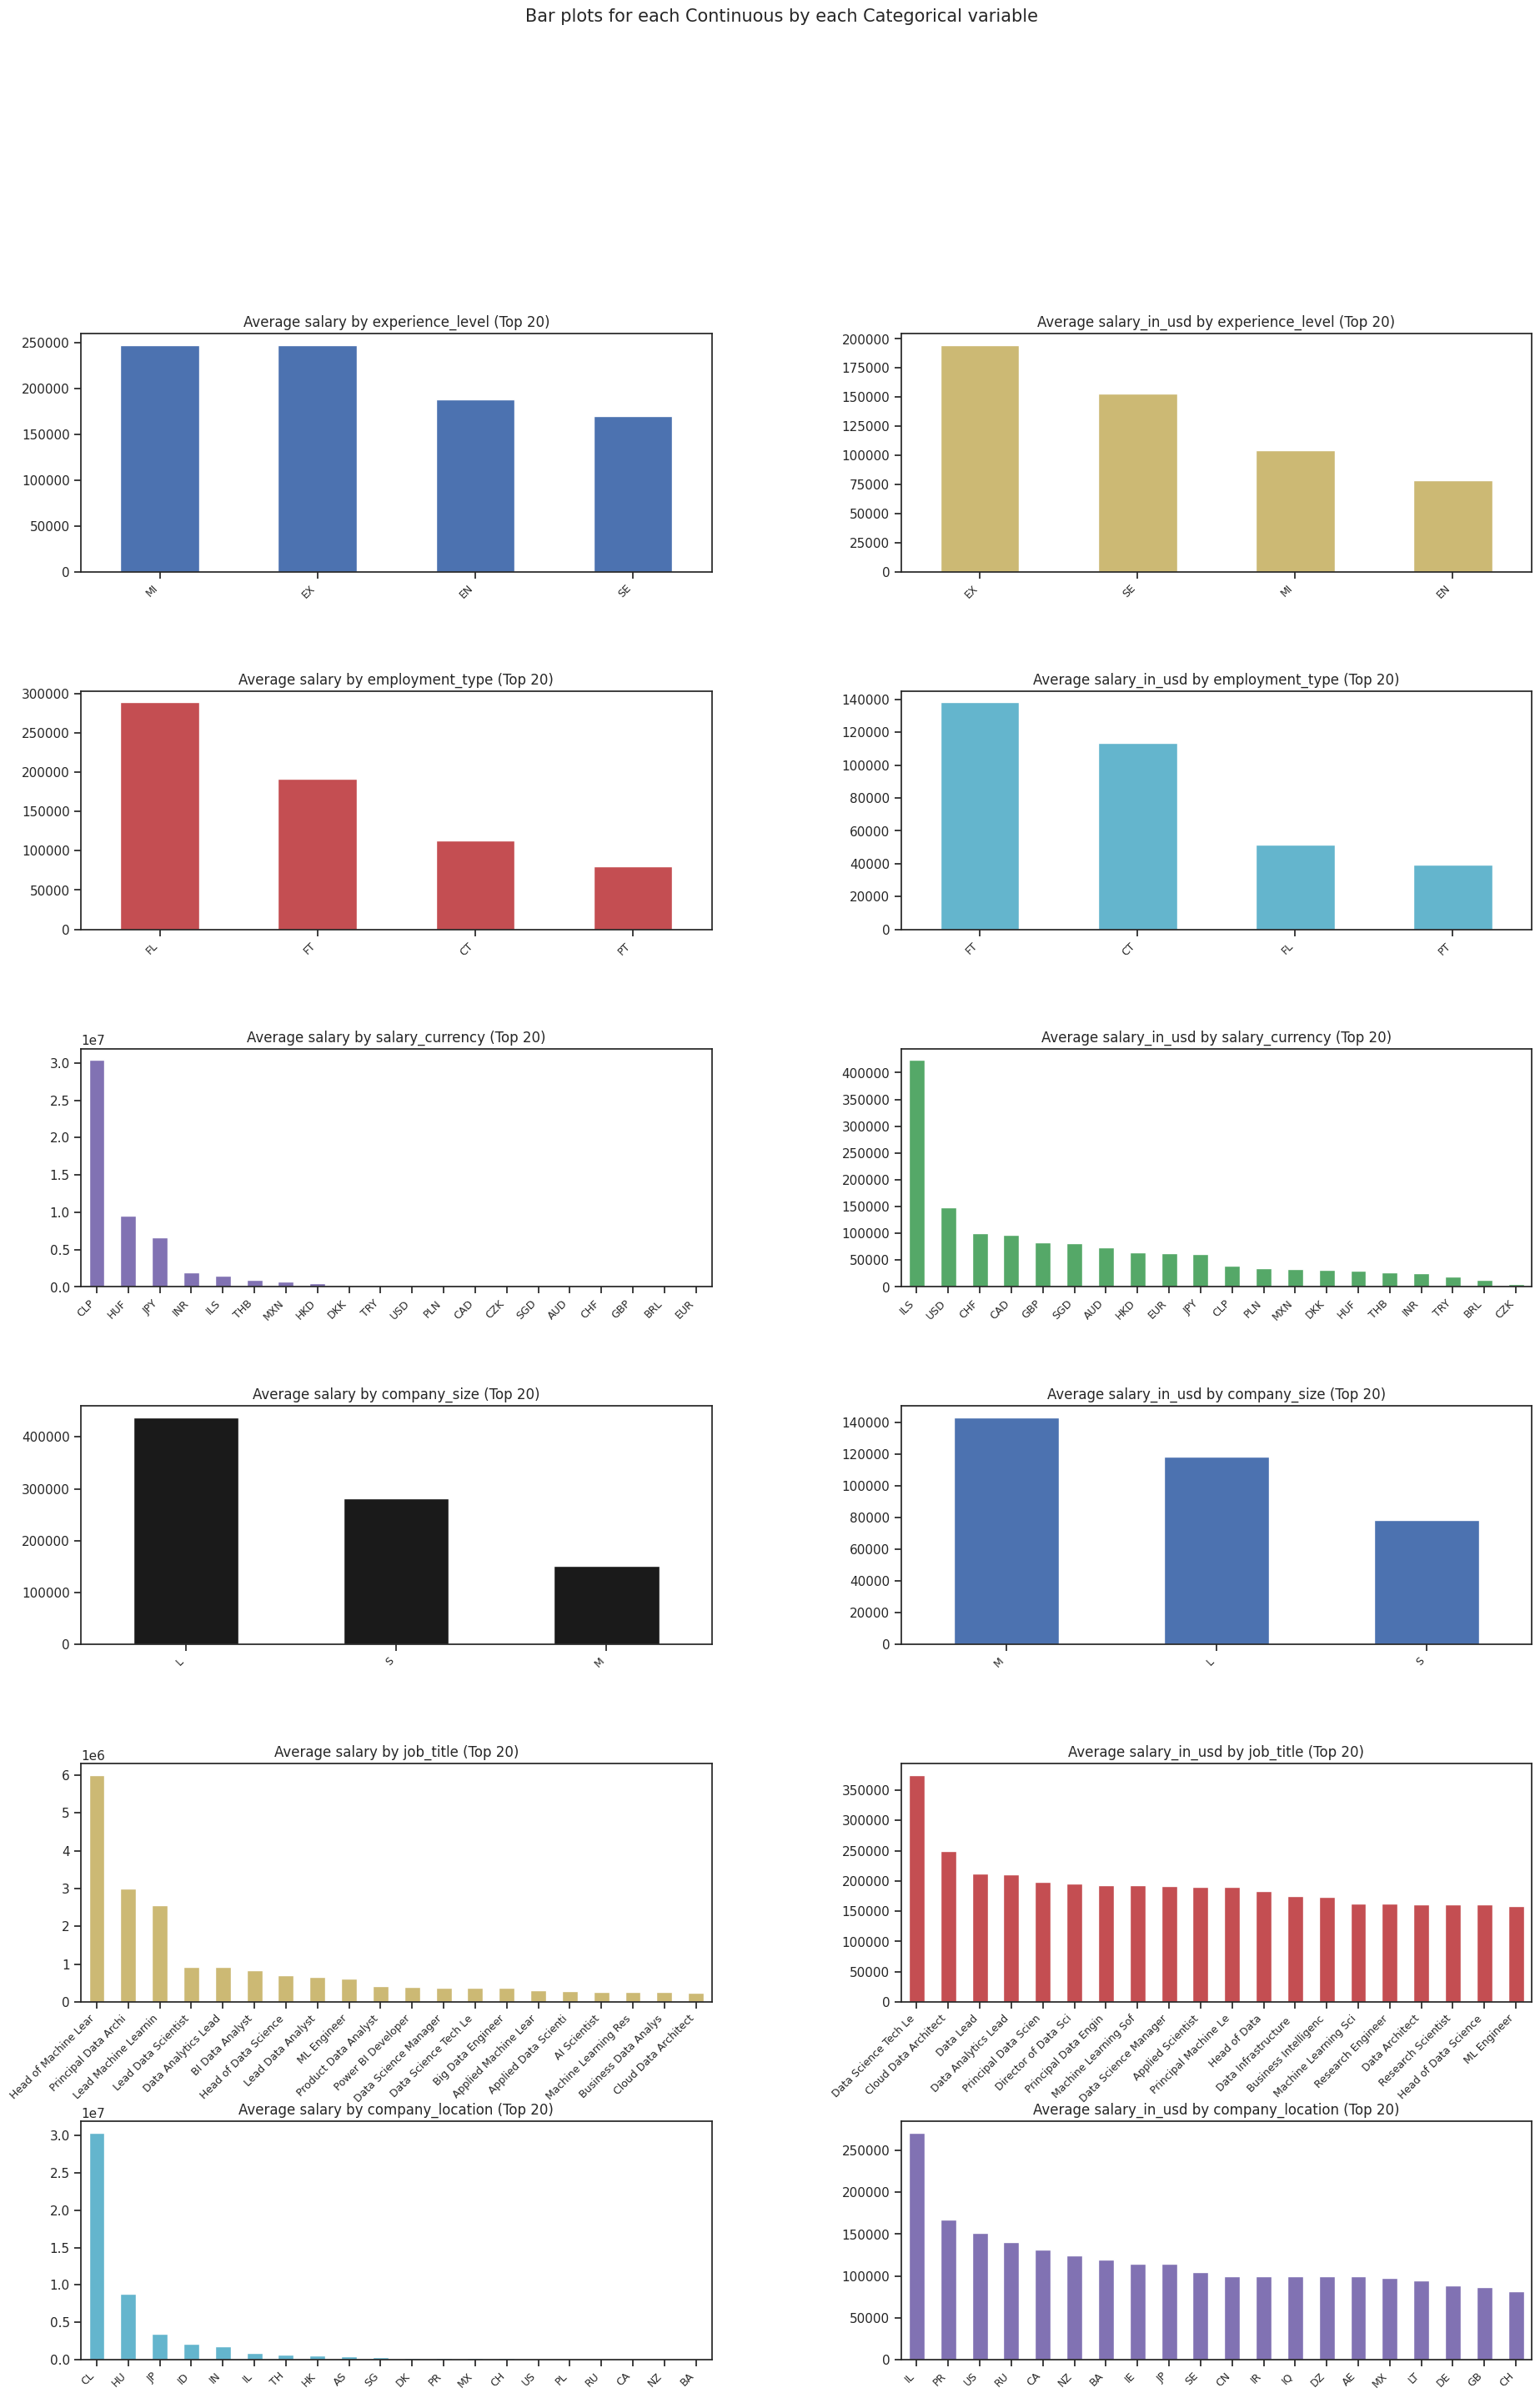

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Import the necessary module
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Provide the file path to your dataset (make sure the path is correct)
filename = '/content/drive/My Drive/DS_salary.csv'

# Perform EDA using AutoViz
# Pass the filename directly, and leave other parameters as default
dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
                  chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30, save_plot_dir=None)

# This will display the results inline

